# Fourier Transform

In [19]:
import librosa
import librosa.display
import IPython.display as ipd

import cmath
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


from pathlib import Path

In [2]:
DATA_PATH = Path("__file__").resolve().parents[1] / "data" / "audio-signal-processing"

In [3]:
# load audio file in the player
audio_path = DATA_PATH / "piano_c.wav"
ipd.Audio(audio_path)

## Intuition

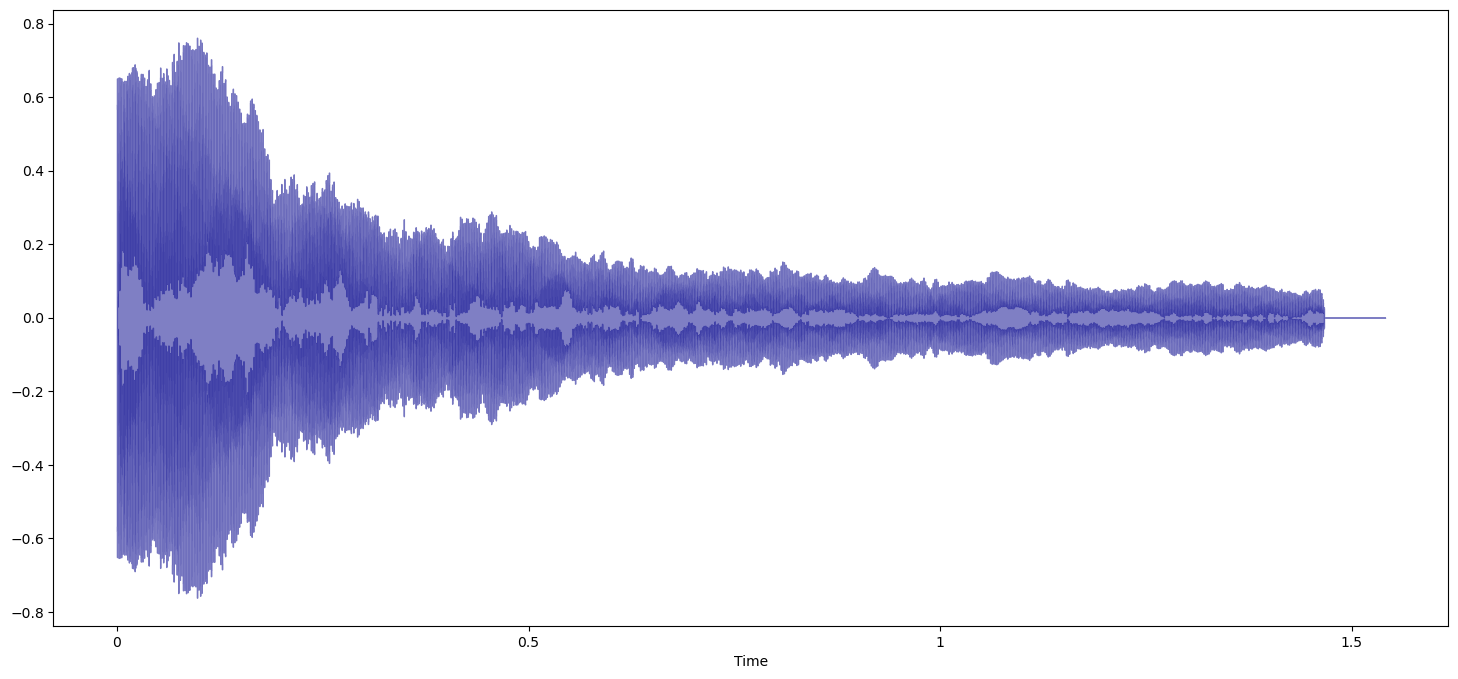

In [9]:
# load audio file
signal, sr = librosa.load(audio_path)

# plot waveform: x-axis (time), y-axis (amplitude)
plt.figure(figsize=(18, 8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5, color='darkblue')
plt.show()

In [13]:
len(signal) # 33968 samples

33968

In [11]:
# derive spectrum using FT
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))  # linear space between 0 and sr, with space=len(magnitude)

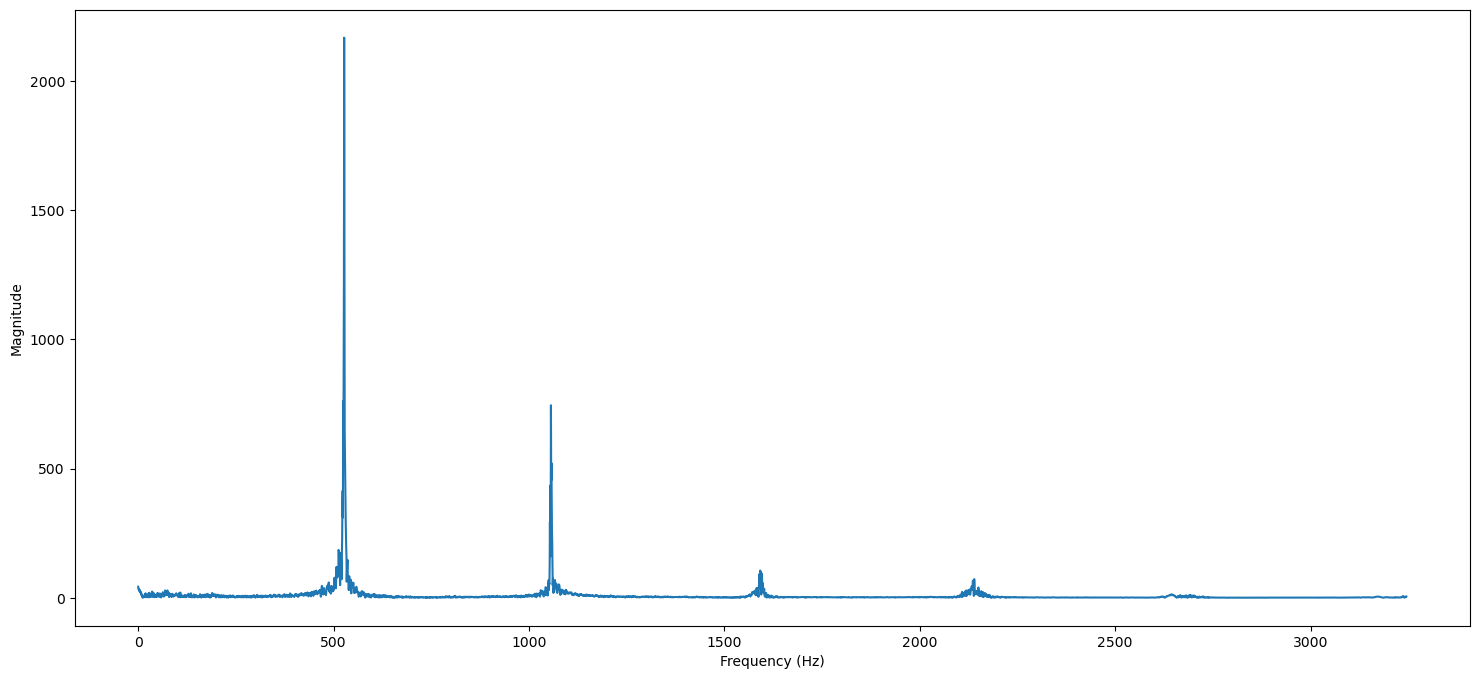

In [12]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

- Huge spike at 523Hz (Fundamental Sound), followed by few spikes 1040Hz
- Let's zoom in the signal @ 523Hz 


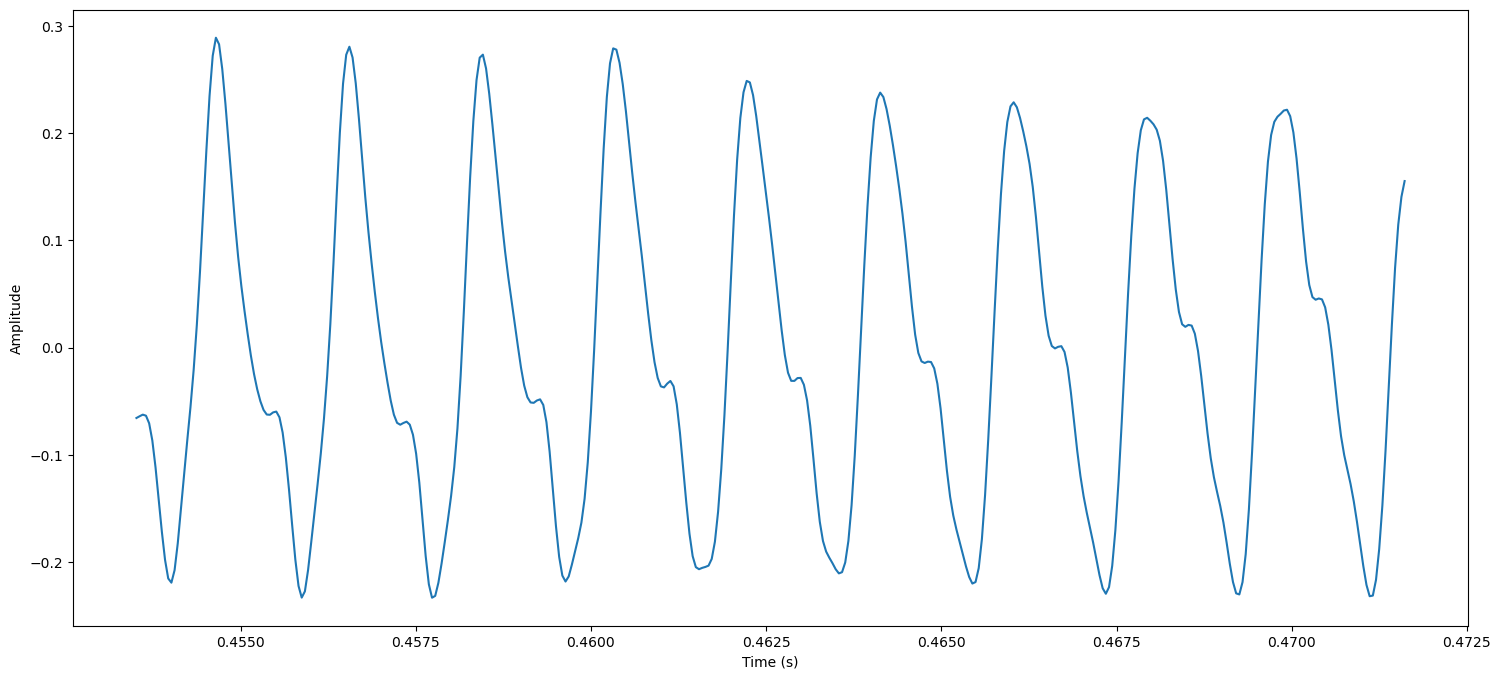

In [16]:
# zomm into the waveform 
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

# plot 400 samples from 10K_th sample to 10K4_th sample
plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

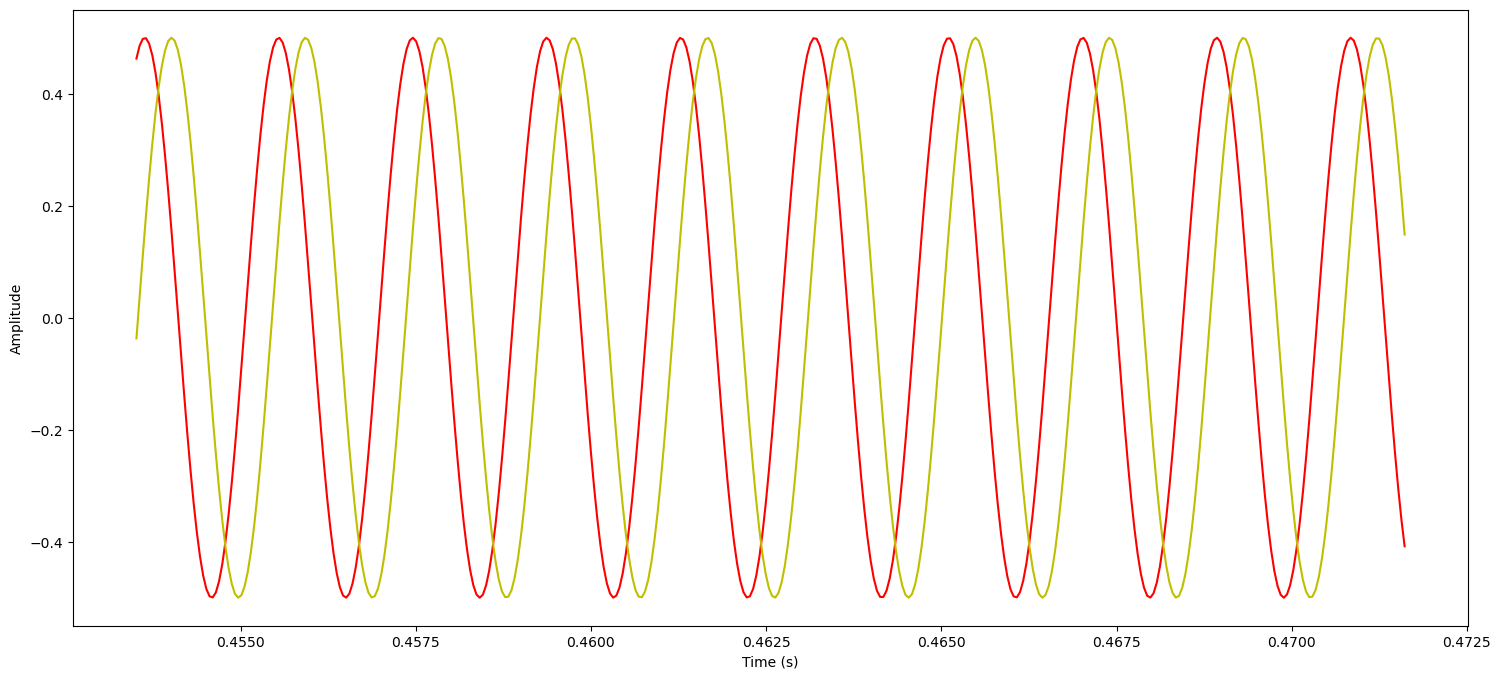

In [15]:
# create a sinusoid

f = 523 # fundamental freq at 523Hz
phase = 0
phase_2 = 0.2 # phase move between 0 and 1

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin_2 = 0.5 * np.sin(2*np.pi * (f * t - phase_2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin_2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

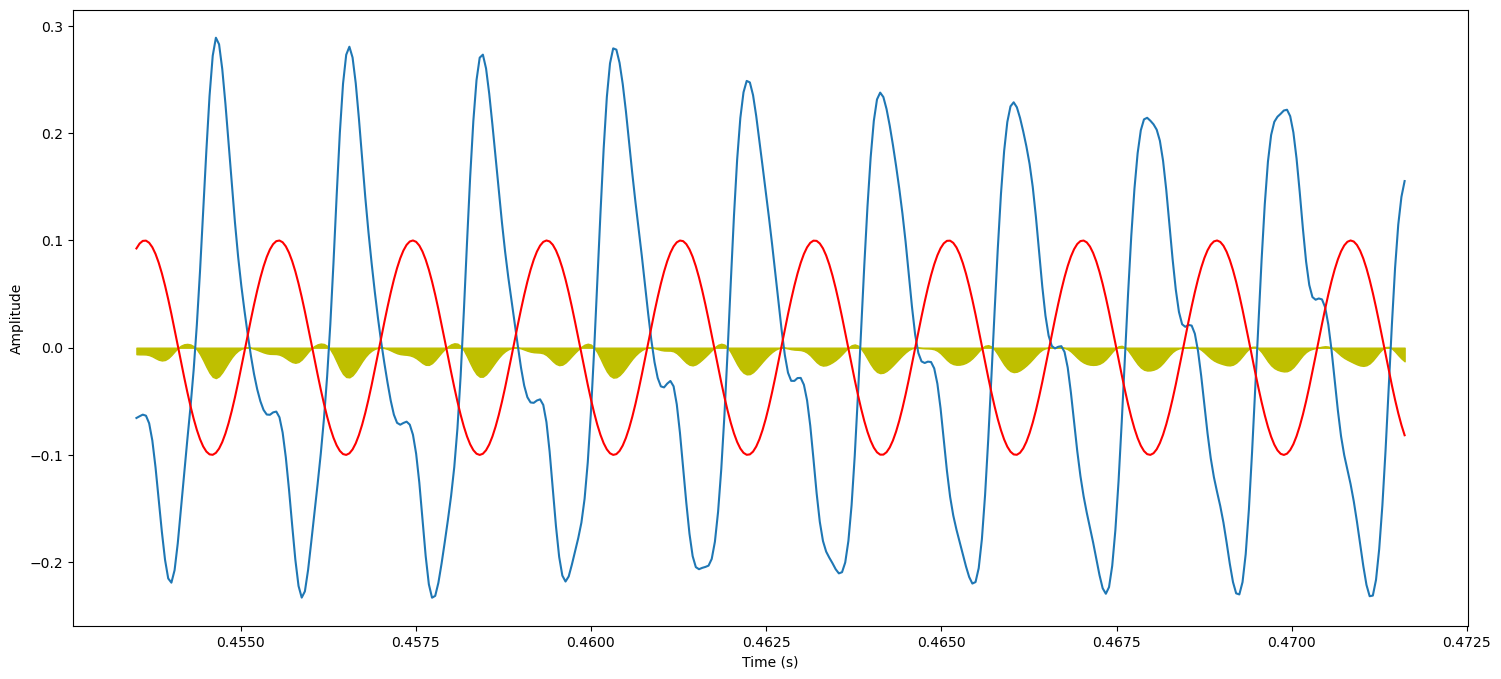

In [18]:
# compare signal and sinusoids

f = 523 # fundamental freq
phase = 0.55 # 0

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

# multiply sin signal with orignal signal
# the +ve vol (phase of sin = 0.55): both sin signal with orignal signal have the same sign
# the -ve vol (phase of sin = 0): both sin signal with orignal signal have diff phase
# mix (+ve -ve) (phase of sin = 0.4)

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

- Fourier transform:
    - Step 1: Choose a frequency
    - Step 2: Optimise phase
    - Step 3: Cal magnitude (the similarity between the sine & original signal)
    - Repeate the step=1 to step=3 with mulitple frequencies

###

## Defining the Fourier Transform Using Complex Numbers

In [21]:

def create_signal(frequency, time):
    """Create the signal from multiple sine waves"""
    sin = np.sin(2 * np.pi * (frequency * time))
    sin2 = np.sin(2 * np.pi * (2 * frequency * time))
    sin3 = np.sin(2 * np.pi * (3 * frequency * time))

    return sin + sin2 + sin3

def plot_signal(signal, time):
    plt.figure(figsize=(15, 10))
    plt.plot(signal, time)
    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.show()

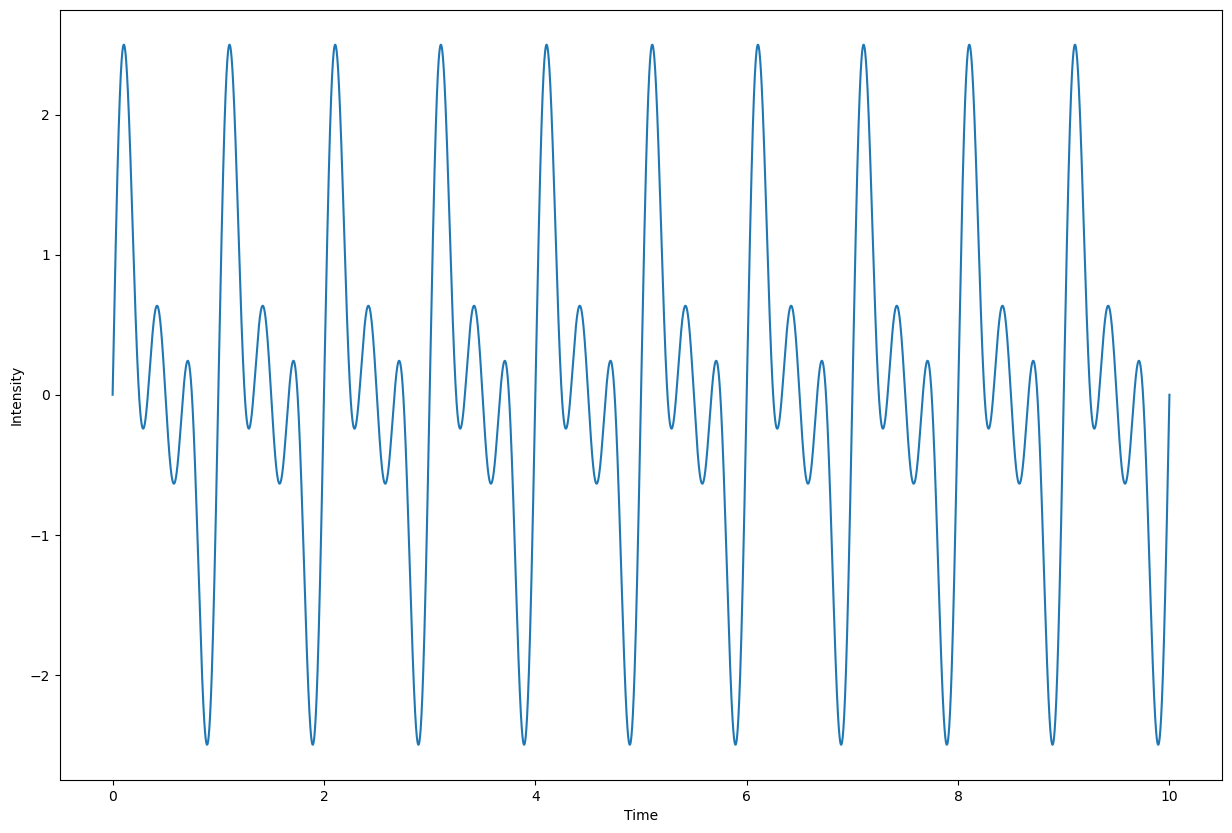

In [22]:
time = np.linspace(0, 10, 10000)
signal = create_signal(frequency=1, time=time)
plot_signal(time, signal)

In [23]:
def create_pure_tone(frequency, time):
    angle = -2 * np.pi * frequency * time
    return np.cos(angle) + 1j * np.sin(angle)

In [24]:
def calculate_centre_of_gravity(mult_signal):
    x_centre = np.mean([x.real for x in mult_signal])
    y_centre = np.mean([x.imag for x in mult_signal])
    return x_centre, y_centre

In [25]:
def calculate_sum(mult_signal):
    x_sum = np.sum([x.real for x in mult_signal])
    y_sum = np.sum([x.imag for x in mult_signal])
    return x_sum, y_sum


In [26]:
def plot_fourier_transform(pure_tone_frequency, 
                           signal_frequency, 
                           time, 
                           plot_centre_of_gravity=False,
                           plot_sum=False):
    
    # create sinusoid and signal
    pure_tone = create_pure_tone(pure_tone_frequency, time)
    signal = create_signal(signal_frequency, time)
    
    # multiply pure tone and signal
    mult_signal = pure_tone * signal
    
    X = [x.real for x in mult_signal]
    Y = [x.imag for x in mult_signal]

    plt.figure(figsize=(15, 10))
    plt.plot(X, Y, 'o')

    # calculate and plot centre of gravity
    if plot_centre_of_gravity:
        centre_of_gravity = calculate_centre_of_gravity(mult_signal)
        plt.plot([centre_of_gravity[0]], [centre_of_gravity[1]], marker='o', markersize=10, color="red")


    # calculate and plot sum 
    if plot_sum:
        integral = calculate_sum(mult_signal)
        plt.plot([integral[0]], [integral[1]], marker='o', markersize=10, color="green")

    
    # set origin axes
    ax = plt.gca()
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    if not plot_sum:
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)

    plt.show()

In [27]:
time = np.linspace(0, 1, 10000)
plot_fourier_transform(pure_tone_frequency=1.1,
                       signal_frequency=1,
                       time=time,
                       plot_centre_of_gravity=False,
                       plot_sum=False
                       )

SyntaxError: incomplete input (2508219768.py, line 6)